In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


TFile**		test_file.root	
 TFile*		test_file.root	
  KEY: RooDataSet	ds_k;1	Ostap.Selectors/ds_1000 
  KEY: TProcessID	ProcessID0;1	4de99c20-f0e9-11e9-ba22-e368b8bcbeef
  KEY: RooDataSet	ds_pi;1	Ostap.Selectors/ds_1000 
[#1] INFO:InputArguments -- The formula im>2.24 && im<2.33 claims to use the variables (pt,y,ct,ch,id,ipc,p_p,eta_p,phi_p,p_k,eta_k,p_3,eta_3,ntrk,NNp,im,im_kp,im_pi,im_hp,m12,m13,m23,NNk,NN3,lgi) but only (im) seem to be in use.
  inputs:         im>2.24 && im<2.33
  interpretation: [im]>2.24 && [im]<2.33


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


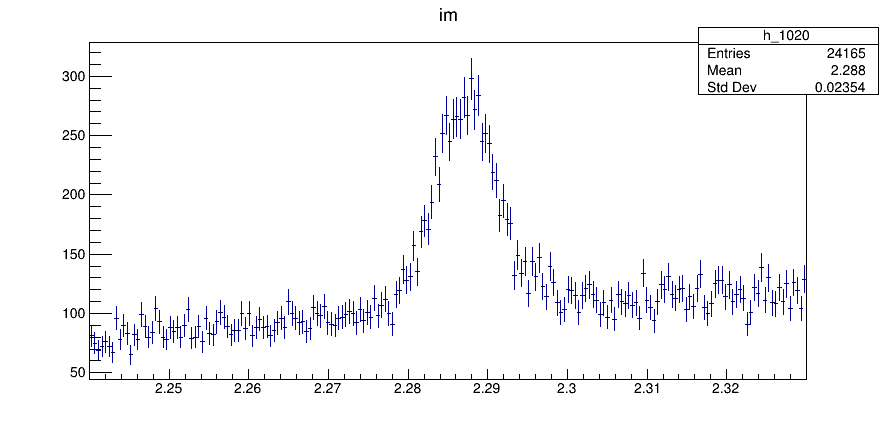

In [5]:
canv = ROOT.TCanvas("canv","canv",900,450)
rfile = ROOT.TFile("test_file.root","READ")
rfile.ls()
ds = rfile["ds_k"].reduce("im>2.24 && im<2.33")
ds.draw("im")
canv.Draw()

In [6]:
print(ds)

+RooDataSet("ds_1000","Ostap.Selectors/ds_1000 "):24166 entries, 25 variables---+
|    Variable    |  Description  |   mean    |   rms    |    min     |   max    |
+----------------+---------------+-----------+----------+------------+----------+
|  1. NN3        | NN3           |  +0.50937 | 0.29397  |   +0.10004 | +0.9988  |
|  2. NNk        | NNk           |  +0.57554 | 0.28655  |   +0.10003 | +0.99857 |
|  3. NNp        | NNp           |  +0.73168 | 0.1612   |   +0.50001 | +0.99925 |
|  4. ch         | ch            |   +3.4178 | 3.0603   |  +0.026929 | +62.676  |
|  5. ct         | ct            |  +0.45903 | 0.31945  |    +0.1062 | +17.409  |
|  6. eta_3      | eta_3         |   +2.9491 | 0.54012  |    +2.0003 | +4.8721  |
|  7. eta_k      | eta_k         |   +2.9461 | 0.53469  |    +2.0002 | +4.8744  |
|  8. eta_p      | eta_p         |   +2.9435 | 0.54776  |    +2.0009 | +4.8895  |
|  9. id         | id            |   -18.422 | 4122     |      -4122 | +4122    |
| 10. im        

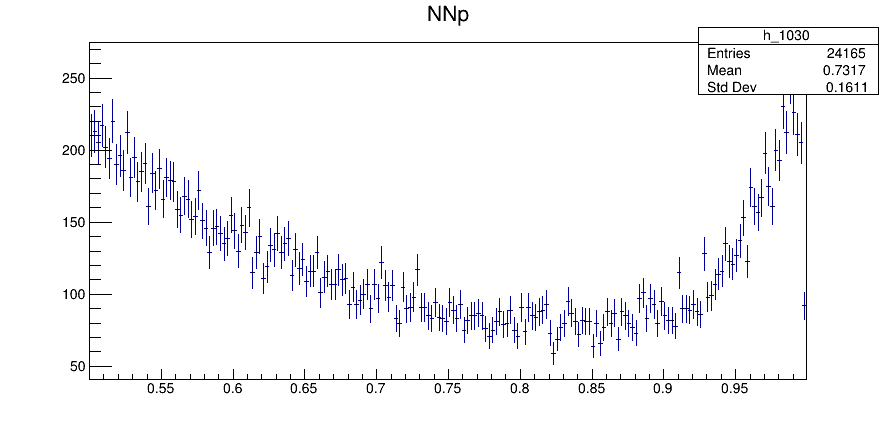

In [7]:
ds.draw("NNp")
canv.Draw()

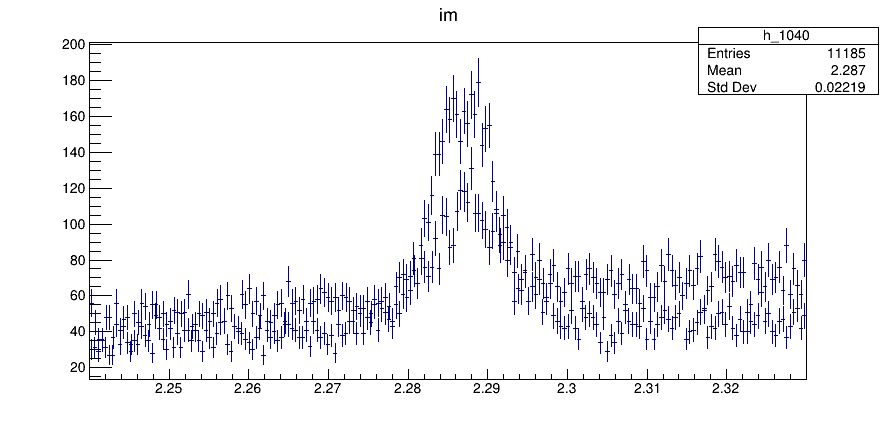

In [8]:
ds.draw("im","NNp>0.73")
ds.draw("im","NNp<0.73","same")
canv.Draw()

In [12]:
NNp_low = []
Ncuts = 50
for i in range(Ncuts):
    NNp_low.append(0.5 +0.5*float(i)/float(Ncuts))
print(NNp_low)

[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.6799999999999999, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.8400000000000001, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.9099999999999999, 0.9199999999999999, 0.9299999999999999, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]



  RooFitResult: minimized FCN value: -279452, estimated distance to minimum: 7.5894e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    1.0000e+00    2.0081e+04 +/-  1.78e+02  0.541097
                     S    1.0000e+00    4.0850e+03 +/-  1.25e+02  0.697471
              asym_sig    0.0000e+00   -5.6928e-02 +/-  5.84e-02  0.941434
              beta_sig    1.0000e+00    1.6886e+00 +/-  4.83e-01  0.936373
              mean_sig    2.2870e+00    2.2870e+00 +/-  3.29e-04  0.940776
             sigma_sig    4.5000e-03    3.5904e-03 +/-  2.36e-04  0.920577
               tau_bkg    0.0000e+00    4.3743e+00 +/-  2.77e-01  0.169228




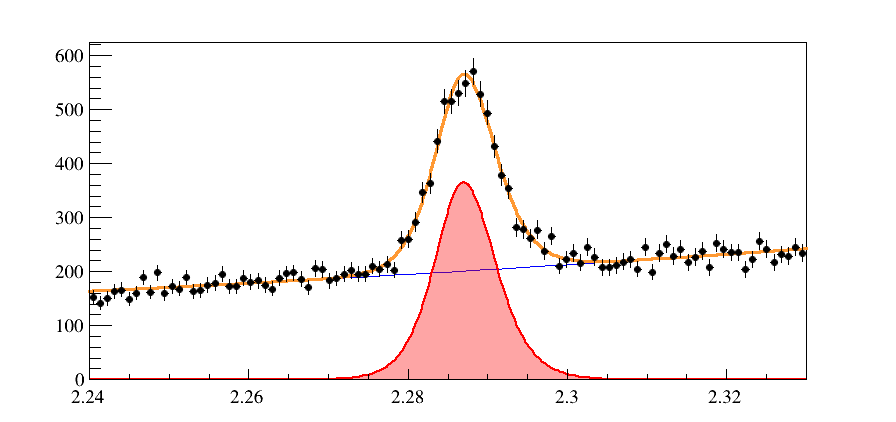

In [15]:
im  = ROOT.RooRealVar("im" ,"im" , 2.24, 2.33)
sig = Models.Apollonios2_pdf("sig",xvar=im,mean=(2.287,2.286,2.289),sigma=(0.0045,0.003,0.008),asymmetry=(0.,-0.1,0.1),beta=(1,0.1,20.))
bkg = Models.Bkg_pdf("bkg", xvar=im, power=0)
model = Models.Fit1D(signal=sig, background=bkg)
dh = ds.reduce(ROOT.RooArgSet(im)).binnedClone()
r,w = model.fitTo(dh, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()

In [18]:
NNp_bins =[]
for nn in NNp_low:
    NNp_bins.append(nn)
NNp_bins.append(1.)
print(NNp_bins)

[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.6799999999999999, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.8400000000000001, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.9099999999999999, 0.9199999999999999, 0.9299999999999999, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


In [36]:
model.signal.mean.fix()
model.signal.sigma.fix()
model.signal.asym.fix()
model.signal.beta.fix()
h_fit = h1_axis(NNp_bins).red()
h_bkg = h1_axis(NNp_bins)
for b in range(len(NNp_bins)-1):
    slice_cut = "NNp>"+str(NNp_bins[b])+" && NNp<1."
    slice_ds = ds.reduce( ROOT.RooArgSet(im), slice_cut)
    r_slice, w_slice = model.fitTo(slice_ds, draw=True, silent=True)
    print( "Bin " + str(b) + "  -->  " + str(r_slice("S")[0]) + " signal events")
    h_fit[b+1] = r_slice("S")[0]
    h_bkg[b+1] = r_slice("B")[0]

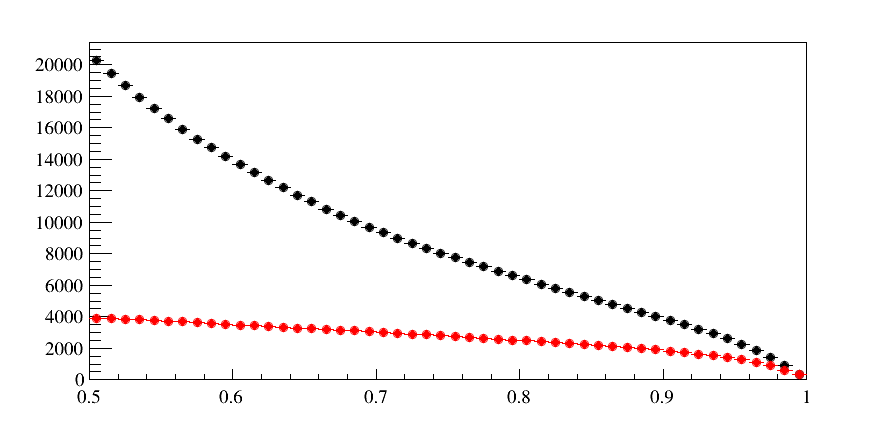

In [24]:
h_bkg.Draw()
h_fit.Draw("same")
canv.Draw()

0.5	( 3905.41 +- 91.4595 )	( 0.466884 +- 0.0109338 )	2.341868378369296
0.51	( 3867.53 +- 90.4116 )	( 0.473136 +- 0.0110605 )	2.337708906826467
0.52	( 3823.74 +- 89.3272 )	( 0.479205 +- 0.0111948 )	2.3361199183409833
0.53	( 3800.71 +- 88.3992 )	( 0.486371 +- 0.0113123 )	2.325862109616013
0.54	( 3753.98 +- 87.3054 )	( 0.492505 +- 0.011454 )	2.325672055635994
0.55	( 3713.1 +- 86.2977 )	( 0.498583 +- 0.0115878 )	2.3241438634697227
0.56	( 3681.89 +- 85.3254 )	( 0.505724 +- 0.0117198 )	2.317435942055939
0.5700000000000001	( 3639.77 +- 84.3676 )	( 0.511354 +- 0.0118529 )	2.317939935816084
0.58	( 3570.35 +- 83.2484 )	( 0.51518 +- 0.0120122 )	2.3316597231958283
0.59	( 3529.83 +- 82.3624 )	( 0.520351 +- 0.0121415 )	2.333322035118424
0.6	( 3477.48 +- 81.3861 )	( 0.525006 +- 0.0122871 )	2.3403752186941476
0.61	( 3428.27 +- 80.4428 )	( 0.529787 +- 0.0124312 )	2.346452409247311
0.62	( 3400.95 +- 79.6289 )	( 0.536363 +- 0.0125582 )	2.3413704600834055
0.63	( 3341.12 +- 78.7081 )	( 0.539329 +- 0.012705

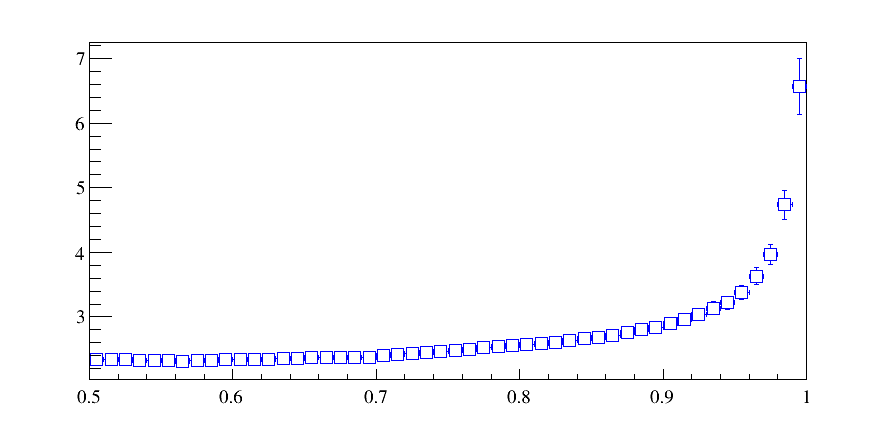

In [40]:
h_rel = h1_axis(NNp_bins)
a = VE(10,10)
for b in range(1,51):
    print( str(NNp_low[b-1]) + "\t" + str(h_fit[b])+ "\t"+str(h_fit[b].purity() ) + "\t" + str(100.*h_fit[b].error()/h_fit[b].value()) )
    h_rel[b] = 100.*h_fit[b].prec()
h_rel.blue()
h_rel.Draw("e1")
canv.Draw()

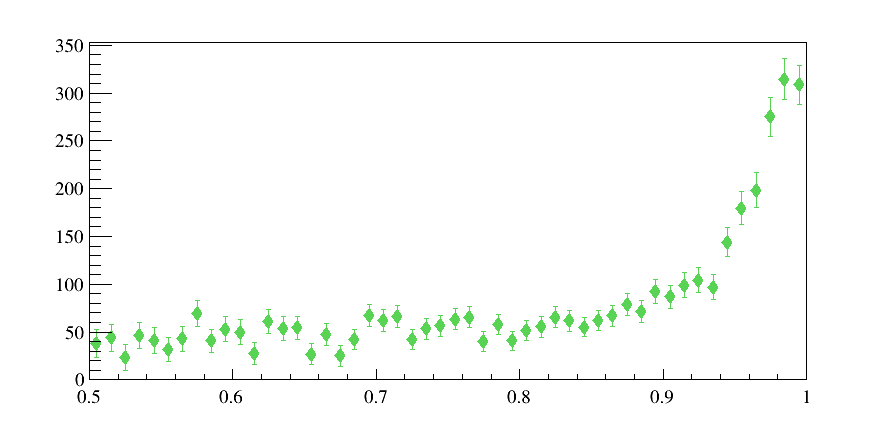

In [42]:
model.sPlot( ds )
h_sPlot = h1_axis( NNp_bins ).green()
for entry in ds:
    h_sPlot.Fill(ds.NNp,ds.S_sw)
h_sPlot.Draw("e1")
canv.Draw()

In [45]:
#help(h_sPlot)
fom1   = h_sPlot.FoM_2 ()

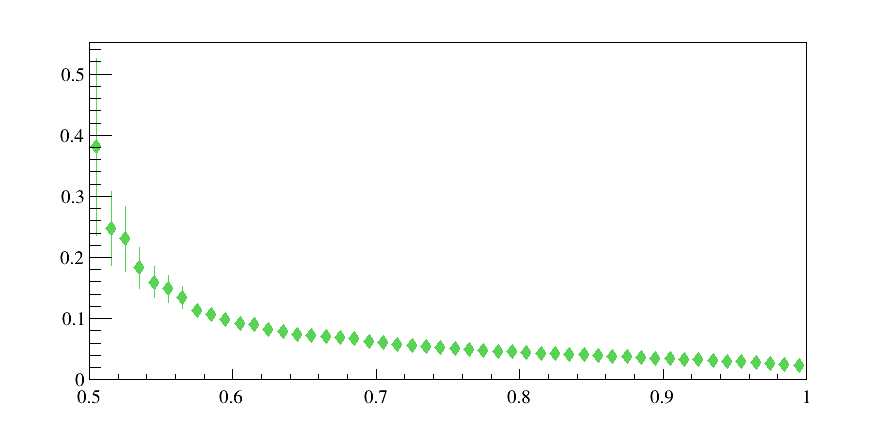

In [48]:
fom1.Draw()
canv.Draw()

In [49]:
help(h_sPlot)

Help on TH1F in module ROOT object:

class TH1F(TH1, TArrayF)
 |  TH1F(*args)
 |  
 |  PyROOT object proxy (internal)
 |  
 |  Method resolution order:
 |      TH1F
 |      TH1
 |      TNamed
 |      TObject
 |      TAttLine
 |      TAttFill
 |      TAttMarker
 |      TArrayF
 |      TArray
 |      ObjectProxy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AddBinContent = <ROOT.MethodProxy object>
 |  Class = <ROOT.MethodProxy object>
 |  Class_Name = <ROOT.MethodProxy object>
 |  Class_Version = <ROOT.MethodProxy object>
 |  Clone = _h_new_clone_(self, name='', title='')
 |      Modifiled Clone-function
 |      - it automatically assigns unique ID
 |      - it ensures that cloned histogram is not going to die with
 |      the accidentally opened file/directory
 |      - a title can be optionally redefined
 |  
 |  Copy = <ROOT.MethodProxy object>
 |  DeclFileLine = <ROOT.MethodProxy object>
 |  DeclFileName = <ROOT.MethodProxy object>
 |  Dictionary = <ROOT.MethodProx